# Nhu Vo


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [4]:
from google.colab import files

# Upload the file from your local machine
uploaded = files.upload()

# This will prompt a file upload dialog


Saving gss7222_r3a.dta to gss7222_r3a.dta


In [17]:
import pandas as pd

# Load the Stata file, now including 'fefam' column in addition to 'id', 'fechld', and 'year'
columns_to_load = ['id', 'fechld', 'fefam', 'year']  # Added 'fefam'
df = pd.read_stata('gss7222_r3a.dta', columns=columns_to_load)

# Display first few rows of the filtered DataFrame to ensure 'fefam' is included
print(df.head())



<ipython-input-17-fefda6ebcd8d>:5: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('gss7222_r3a.dta', columns=columns_to_load)


   id fechld fefam  year
0   1    NaN   NaN  1972
1   2    NaN   NaN  1972
2   3    NaN   NaN  1972
3   4    NaN   NaN  1972
4   5    NaN   NaN  1972


In [6]:

# Step 1: Define the relevant columns to load
columns_to_load = ['id', 'fechld', 'year']

# Load the dataset with numeric labels
print("Loading selected columns with numeric labels...")
df_numeric = pd.read_stata('gss7222_r3a.dta', columns=columns_to_load, convert_categoricals=False)
print("Data with numeric labels loaded successfully!")

# Load the dataset again to get categorical (string) labels
print("Loading selected columns with categorical (string) labels...")
df_categorical = pd.read_stata('gss7222_r3a.dta', columns=columns_to_load)
print("Data with categorical labels loaded successfully!")

# Step 2: Rename the categorical columns by prefixing them with 'z'
df_categorical = df_categorical.rename(columns={col: f'z{col}' for col in df_categorical.columns})

# Step 3: Concatenate the numeric and categorical DataFrames side by side
df = pd.concat([df_numeric, df_categorical], axis=1)

# Step 4: Display the first few rows of the final DataFrame
print("Displaying the combined DataFrame with both numeric and categorical columns:")
print(df.head())


Loading selected columns with numeric labels...
Data with numeric labels loaded successfully!
Loading selected columns with categorical (string) labels...


<ipython-input-6-ce8a0505f2ac>:11: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_categorical = pd.read_stata('gss7222_r3a.dta', columns=columns_to_load)


Data with categorical labels loaded successfully!
Displaying the combined DataFrame with both numeric and categorical columns:
   id  fechld  year  zid zfechld zyear
0   1     NaN  1972    1     NaN  1972
1   2     NaN  1972    2     NaN  1972
2   3     NaN  1972    3     NaN  1972
3   4     NaN  1972    4     NaN  1972
4   5     NaN  1972    5     NaN  1972


# **Conduct a trend analysis of some variable of interest. Graph it and try different functional forms. Look for subgroup variation across time, too. Extra credit if you consider other variables as a means of explaining the trend. Explain all of your results.**

I will begin by examining what the overall trend in belief that mother working doens't hurt children has been from 1977 to 2022



In [7]:
# Step 1: Remove rows with NaN in 'fechld'
df_clean = df.dropna(subset=['fechld'])

# Display cleaned data
print(df_clean.head())

      id  fechld  year  zid            zfechld zyear
7590   1     3.0  1977    1           disagree  1977
7591   2     3.0  1977    2           disagree  1977
7592   3     4.0  1977    3  strongly disagree  1977
7593   4     1.0  1977    4     strongly agree  1977
7594   5     3.0  1977    5           disagree  1977


<ipython-input-8-dabd1fbbacd3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['fechld_label'] = df_clean['fechld'].map(fechld_map)


fechld_label      Agree   Disagree  Strongly Agree  Strongly Disagree
year                                                                 
1977          33.289037  33.554817       15.681063          17.475083
1985          39.525692  28.853755       21.277997          10.342556
1986          40.342466  29.726027       22.123288           7.808219
1988          39.303992  27.737973       23.848516           9.109519
1989          42.424242  28.888889       21.616162           7.070707


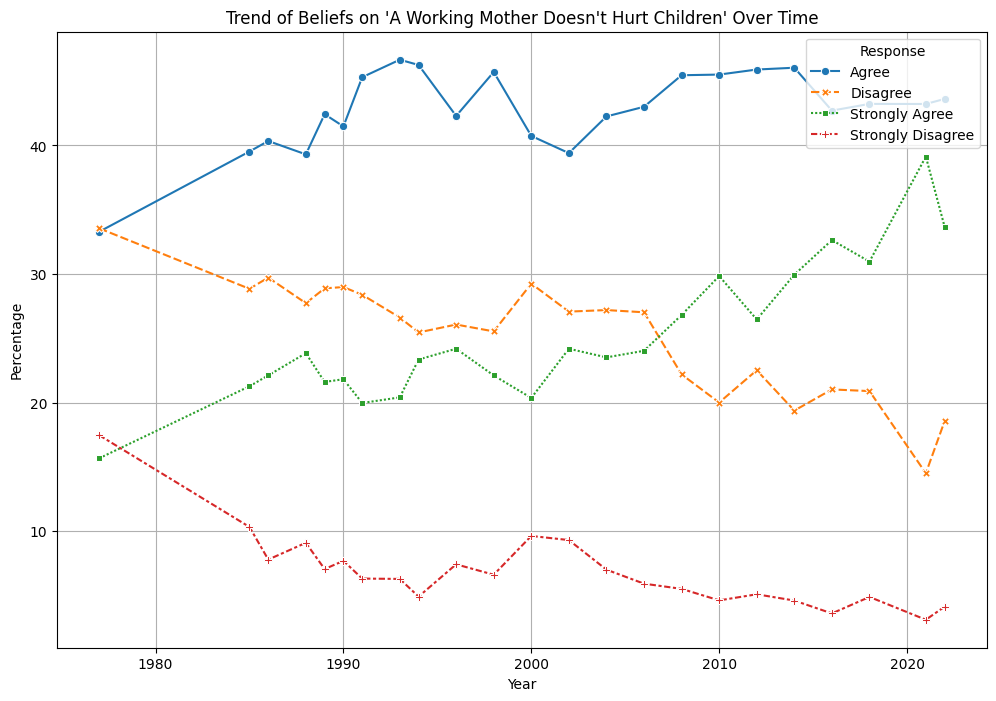

In [8]:
# Step 2: Map numeric values of 'fechld' to their respective categories
fechld_map = {
    1: 'Strongly Agree',
    2: 'Agree',
    3: 'Disagree',
    4: 'Strongly Disagree'
}

# Create a new column with these mapped values for better readability
df_clean['fechld_label'] = df_clean['fechld'].map(fechld_map)

# Step 3: Group by 'year' and 'fechld_label' to calculate the proportion of each response
trend_data = df_clean.groupby(['year', 'fechld_label']).size().unstack(fill_value=0)

# Normalize the data to get percentages
trend_data_percent = trend_data.div(trend_data.sum(axis=1), axis=0) * 100

# Display the first few rows of the trend data to verify
print(trend_data_percent.head())

# Step 4: Plot the trend for each response over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=trend_data_percent, markers=True)
plt.title("Trend of Beliefs on 'A Working Mother Doesn't Hurt Children' Over Time")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Response", loc='upper right')
plt.show()


I wanted to see what all the relevant variables looked like, and really loved how symetrical this graph is, hence decided to keep it. Wow this is super cool and very close to what I expected: As time go on, more and more people agree with the statement: "a working mother can establish just as warm and secure a relationship with her children as a mother who does not work". The reflected Agree and Disagree, or Strongly Agree and Strongly Disagree, respectively almost symetrically reflect each other!

## **Visualizing it with fechld = Strongly Agree**

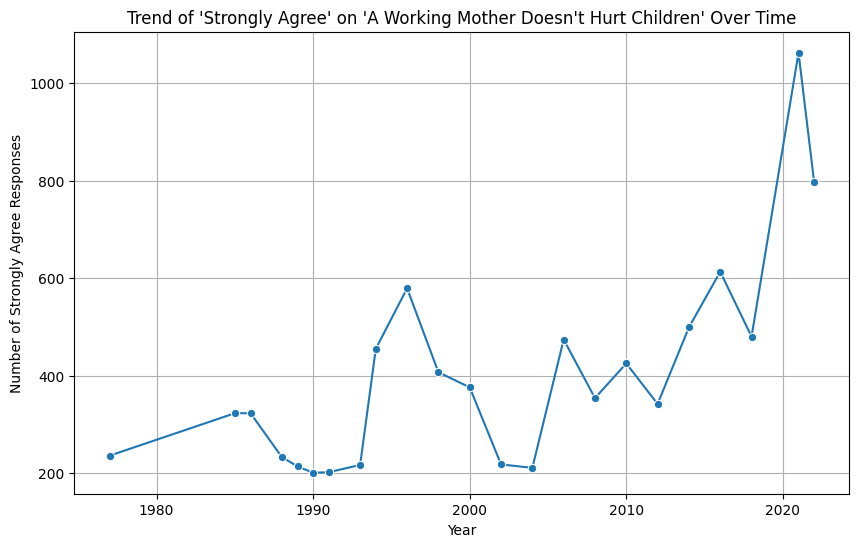

In [9]:
# Step 1: Remove rows with NaN in 'fechld'
df_clean = df.dropna(subset=['fechld'])

# Step 2: Filter the data to only include 'Strongly Agree' (fechld = 1)
df_strongly_agree = df_clean[df_clean['fechld'] == 1]

# Step 3: Group by 'year' to count the number of 'Strongly Agree' responses per year
trend_data = df_strongly_agree.groupby('year').size()

# Step 4: Plot the trend of 'Strongly Agree' responses over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=trend_data.index, y=trend_data.values, marker='o')
plt.title("Trend of 'Strongly Agree' on 'A Working Mother Doesn't Hurt Children' Over Time")
plt.ylabel("Number of Strongly Agree Responses")
plt.xlabel("Year")
plt.grid(True)
plt.show()


To clearly show the trend, I've shown only results for felchld = Strongly Agree.
It appears that over time, there is an upward trend regarding people believing that working mothers can establish secure relationship with their children



# **Percentage of People Who Answered "Strongly Agree" to the statement "A Working Mother have Secure Children" Over The Years"**

In [10]:


# Step 1: Group by 'year' and calculate the percentage of "Strongly Agree" responses (fechld = 1) for each year
percentage_strongly_agree_per_year = df_clean.groupby('year')['fechld'].apply(lambda x: (x == 1).mean() * 100).reset_index()

# Step 2: Rename the columns for clarity
percentage_strongly_agree_per_year.columns = ['year', 'percentage_strongly_agree']

# Step 3: Sort by 'year' to get the top 30 results (by default, .head() will take the first 30 rows)
top_30_results = percentage_strongly_agree_per_year.head(30)

# Display the top 30 results
print(top_30_results)



    year  percentage_strongly_agree
0   1977                  15.681063
1   1985                  21.277997
2   1986                  22.123288
3   1988                  23.848516
4   1989                  21.616162
5   1990                  21.824104
6   1991                  19.980218
7   1993                  20.413923
8   1994                  23.357290
9   1996                  24.195570
10  1998                  22.119565
11  2000                  20.368364
12  2002                  24.195339
13  2004                  23.522854
14  2006                  24.036511
15  2008                  26.818182
16  2010                  29.845506
17  2012                  26.470588
18  2014                  29.951981
19  2016                  32.641108
20  2018                  30.967742
21  2021                  39.130435
22  2022                  33.671743


# **Linear Regression**

In [13]:
# Convert 'fechld' to a binary variable using .loc to avoid the SettingWithCopyWarning
# 1 for "Strongly Agree" (1) or "Agree" (2), 0 for "Disagree" (3) or "Strongly Disagree" (4)
conditions = [
    (df_clean['fechld'] == 1) | (df_clean['fechld'] == 2),  # Strongly Agree or Agree
    (df_clean['fechld'] == 3) | (df_clean['fechld'] == 4)   # Disagree or Strongly Disagree
]
choices = [1, 0]
df_clean.loc[:, 'fechld_binary'] = np.select(conditions, choices, default=np.nan)

# Step 3: Run the regression using the formula interface
model_fechld = smf.ols(formula='fechld_binary ~ year', data=df_clean)

# Step 4: Fit the model
results_fechld = model_fechld.fit()

# Step 5: Output the summary of the regression
print(results_fechld.summary())


                            OLS Regression Results                            
Dep. Variable:          fechld_binary   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     768.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.53e-167
Time:                        01:54:51   Log-Likelihood:                -22601.
No. Observations:               35450   AIC:                         4.521e+04
Df Residuals:                   35448   BIC:                         4.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.7597      0.377    -25.889      0.0

<ipython-input-13-6f5ff7ff865a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'fechld_binary'] = np.select(conditions, choices, default=np.nan)


With a linear time trend...
**year coefficient = 0.0052**: This means, for every additionl year, the proportion of people who Agree/Strongly Agree with the statement increases by 0.52%.
**r-squared = 0.021**: this indicates that only about 2.1% of the variance in the dependent variable (where people agree with the statement about working mother can establish secure relationship with children) is explained by the year. low R-square suggests that year alone is a poor predictor of this belief





# **Regression with Dummies**

In [14]:
# Step 1: Run the regression with year dummies using the formula interface
model_fechld_dummies = smf.ols(formula='fechld_binary ~ C(year)', data=df_clean)

# Step 2: Fit the model
results_fechld_dummies = model_fechld_dummies.fit()

# Step 3: Output the summary of the regression
print(results_fechld_dummies.summary())


                            OLS Regression Results                            
Dep. Variable:          fechld_binary   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     43.17
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          4.02e-184
Time:                        01:54:54   Log-Likelihood:                -22513.
No. Observations:               35450   AIC:                         4.507e+04
Df Residuals:                   35427   BIC:                         4.527e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4897      0.012     

In my original model (fechld_binary ~ year), I assumed that the effect of time (year) on the outcome is linear (e.g., beliefs change by a fixed amount each year). By introducing year dummies (C(year)), I'm allowing for year-specific effects, meaning that the effect of each individual year on the outcome can differ and does not need to follow a linear trend.
In other words, each year gets its own coefficient, which compares how beliefs in that year differs from the baseline year.

It's interesting that all my p-values are 0, which means they're statistically significant.

C(year)[T.1985] = 0.1183: This means that in the year 1985, 12% points more people Strongly Agreed/Agreed with the statement compared to baseline year.

C(year)[T.1994] = 0.2064: This means that in the year 1994, 21% points more people Strongly Agreed/Agreed with statement compared to baseline year.

C(year)[T.2022] = 0.2831: This means that in the year 1985, 28% points more people Strongly Agreed/Agreed with the statement compared to baseline year.

Looking at the progession over the years, it looks like there is an increase in the percentage as time goes on.

R-squared increased to 2.6%


# **Subgroup Variation**

In [27]:
# Convert 'fechld' to a binary variable based on string values
fechld_conditions = [
    (df['fechld'] == 'strongly agree') | (df['fechld'] == 'agree'),  # Positive responses
    (df['fechld'] == 'disagree') | (df['fechld'] == 'strongly disagree')  # Negative responses
]
fechld_choices = [1, 0]  # 1 for positive, 0 for negative
df['fechld_binary'] = np.select(fechld_conditions, fechld_choices, default=np.nan)

# Convert 'fefam' to a binary variable based on string values
fefam_conditions = [
    (df['fefam'] == 'strongly agree') | (df['fefam'] == 'agree'),  # Positive responses
    (df['fefam'] == 'disagree') | (df['fefam'] == 'strongly disagree')  # Negative responses
]
fefam_choices = [1, 0]  # 1 for positive, 0 for negative
df['fefam_binary'] = np.select(fefam_conditions, fefam_choices, default=np.nan)

# Drop rows where 'fechld_binary', 'fefam_binary', or 'year' are NaN
df_clean = df.dropna(subset=['fechld_binary', 'fefam_binary', 'year'])

# Check the result
print(df_clean[['fechld', 'fefam', 'fechld_binary', 'fefam_binary']].head())


                 fechld              fefam  fechld_binary  fefam_binary
7590           disagree              agree            0.0           1.0
7591           disagree              agree            0.0           1.0
7592  strongly disagree     strongly agree            0.0           1.0
7593     strongly agree  strongly disagree            1.0           0.0
7594           disagree              agree            0.0           1.0


<ipython-input-28-b93597bd35af>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fechld_mean_per_year = df_clean.groupby('year')['fechld_binary'].mean().reset_index()
<ipython-input-28-b93597bd35af>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fefam_mean_per_year = df_clean.groupby('year')['fefam_binary'].mean().reset_index()


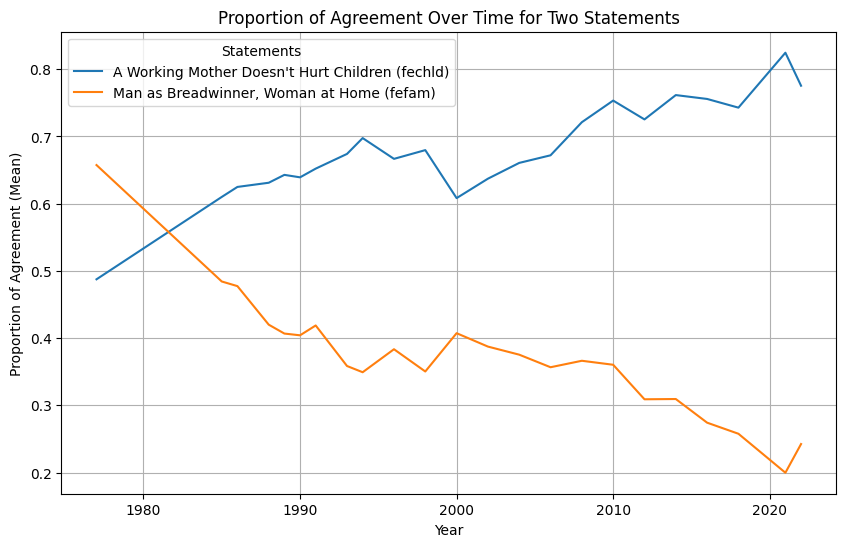

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean (proportion) of agreement per year for both variables
fechld_mean_per_year = df_clean.groupby('year')['fechld_binary'].mean().reset_index()
fefam_mean_per_year = df_clean.groupby('year')['fefam_binary'].mean().reset_index()

# Merge both dataframes on 'year' to plot both on the same graph
df_merged = pd.merge(fechld_mean_per_year, fefam_mean_per_year, on='year', suffixes=('_fechld', '_fefam'))

# Plot the trends for both 'fechld' and 'fefam'
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='fechld_binary', data=df_merged, label="A Working Mother Doesn't Hurt Children (fechld)")
sns.lineplot(x='year', y='fefam_binary', data=df_merged, label="Man as Breadwinner, Woman at Home (fefam)")

plt.title('Proportion of Agreement Over Time for Two Statements')
plt.xlabel('Year')
plt.ylabel('Proportion of Agreement (Mean)')
plt.legend(title='Statements')
plt.grid(True)
plt.show()


Wow, this is a beautiful graph - as if it's directly flipped over, suggesting that those that believe that a working mother doesn't hurt children is inversely correlated with believing that man should be breadwinners and woman should stay at home over time (not surprising).

As the belief that "a working mother can establish secure relationships with their children" increases (blue line rises), the belief that "man should be the breadwinner and woman should stay at home" declines (orange line falls).

Around the 1970s, the belief in traditional gender role was quiet strong, with almost 70% of people agreeing that men should be breadwinners while women should stay home. During this period, belief that working mother doesn't hurt children (blue line) was slightly lower than 50%.

By the 2000s and beyond, the belief that men should be breadwinner drops under 50%, while the belief that a working mother doesn't harm children continues to grow.

In [31]:
# Define the OLS regression model
model = smf.ols(formula='fechld_binary ~ year + fefam_binary', data=df_clean)

# Fit the model
results = model.fit()

# Output the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          fechld_binary   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     243.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:19:30   Log-Likelihood:                -19980.
No. Observations:               34894   AIC:                         4.001e+04
Df Residuals:                   34870   BIC:                         4.021e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7690      0.003    264.695   

in this model, year is treated as  categorical variable (dummy-coded), aka instead of assuming a linear relationship between outcome and year, the model estimates a separate coefficient for each year which represents the difference between the year and reference year

**fefam_binary (-0.3286):**  people who agree with traditional gender roles are about 33 percentage points less likely to agree that a working mother doesn’t hurt children.

**R-squared: 0.138**: The model explains 13.8% of the variance in the dependent variable (fechld_binary).

**F-statistic (243.1) and Prob (F-statistic: 0.00)**: The F-statistic tests whether the overall model is statistically significant. The very low p-value (< 0.001) means that the model as a whole is statistically significant.

In [33]:
# Convert 'year' to numeric
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')

# Now run the regression again
model = smf.ols(formula='fechld_binary ~ year + fefam_binary', data=df_clean)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          fechld_binary   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2730.
Date:                Tue, 08 Oct 2024   Prob (F-statistic):               0.00
Time:                        03:12:44   Log-Likelihood:                -20038.
No. Observations:               34894   AIC:                         4.008e+04
Df Residuals:                   34891   BIC:                         4.011e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.2014      0.363    -14.342   

<ipython-input-33-961cf6bd8618>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')


**Year Coefficient: 0.0030:**
This coefficient indicates that, on average, agreement with the statement "a working mother doesn’t hurt children" increases by 0.3 percentage points per year.
Since the coefficient is positive and statistically significant (p-value < 0.000), it shows that over time, people are becoming more likely to agree with the idea that working mothers can have secure relationships with their children

**fefam_binary Coefficient: -0.3305:**
This coefficient suggests that respondents who agree with traditional gender roles (i.e., that men should be the breadwinners and women should stay at home) are 33 percentage points less likely to agree that a working mother doesn’t hurt her children.The negative sign indicates that belief in traditional gender roles is strongly associated with disagreement with the statement about working mothers.
This relationship is also highly statistically significant (p-value < 0.000).


**R-squared: 0.135:**
This means that the model explains 13.5% of the variation in the belief that "a working mother doesn’t hurt children" (fechld_binary).
